In [1]:
#Install Hamilton if not avaiable

try:
    import hamilton
except ModuleNotFoundError:
    %pip install sf-hamilton

# Parallelism: Paralellizable Subclass [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/dagworks-inc/hamilton/blob/main/examples/parallelism/parallelizable_subclass/notebook.ipynb) [![GitHub badge](https://img.shields.io/badge/github-view_source-2b3137?logo=github)](https://github.com/dagworks-inc/hamilton/blob/main/examples/parallelism/parallelizable_subclass/notebook.ipynb)

When annotating a function with `Parallelizable`, it is not possible to specify in the annotation what the type returned by the function will actually be, and these are not identified by a linter or other tools as static type checking. Especially for functions that can be used with or without Hamilton, this can be a problem.

To solve this problem, it is possible to create subclasses of the `Parallelizable` classes, as demonstrated in this example.

We start by importing Hamilton and the created example functions:

In [2]:
from hamilton import driver

import functions

Creating a driver and displaing all the module functions, we can see the `hello_list` function, that returns a `ParallelizableList`. This is a example `Parallelizable` subclass created for annotate functions that returns `list`. Is important to note that all `Parallelizable` subclasses must return a `Iterable` subclass, as for example list.

The `ParallelizableList` implementation can be found in the ["parallelizable_list.py" file](https://github.com/dagworks-inc/hamilton/blob/main/examples/parallelism/parallelizable_subclass/parallelizable_list.py).

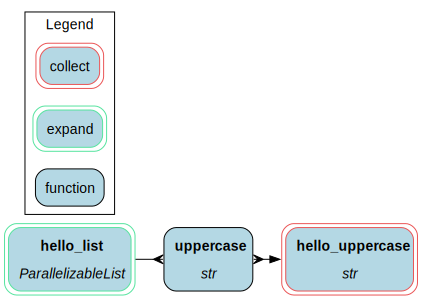

In [3]:
dr = (
        driver.Builder()
        .with_modules(functions)
        .enable_dynamic_execution(allow_experimental_mode=True)
        .build()
    )

dr.display_all_functions()

In this simple example, the created flow generates a list with "hello list" letters, converts each letter to uppercase in parallel, and then joins the letters together:

In [4]:
dr.execute(["hello_uppercase"])

{'hello_uppercase': 'HELLO LIST'}

Focusing attention on the function that was annotated with ParallelizableList, running it manually we can see that it actually returns a list:

In [5]:
functions.hello_list()

['h', 'e', 'l', 'l', 'o', ' ', 'l', 'i', 's', 't']

Checking the annotation, we can see the return annotation as "ParallelizableList[str]":

In [6]:
functions.hello_list.__annotations__

{'return': parallelizable_list.ParallelizableList[str]}

And, the key point of using subtypes of `Parallelizable`, it is considered a list instance:

In [7]:
issubclass(functions.hello_list.__annotations__["return"], list)

True

This means that when using a linter or static type checking, it will correctly identify the return type as a list instance.